In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df= pd.read_csv('ttraining.csv')
df.head(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [3]:
datadict=pd.DataFrame(df.dtypes)
datadict

,0
2401,int64
Borderlands,object
Positive,object
"im getting on borderlands and i will murder you all ,",object


In [4]:
# Identifying number of missing values and unique values
datadict['MissingVal']=df.isnull().sum()
datadict['UniqueVal']=df.nunique()
datadict['Count']=df.count()
datadict

,0,MissingVal,UniqueVal,Count
2401,int64,0,12447,74681
Borderlands,object,0,32,74681
Positive,object,0,4,74681
"im getting on borderlands and i will murder you all ,",object,686,69490,73995


In [5]:
df.columns = ['number', 'topic', 'sentiment', 'text']

In [6]:
df.head(10)

,number,topic,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   number     74681 non-null  int64 
 1   topic      74681 non-null  object
 2   sentiment  74681 non-null  object
 3   text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
df['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [9]:
df.dropna(inplace=True)

In [10]:
df.drop_duplicates(inplace=True)

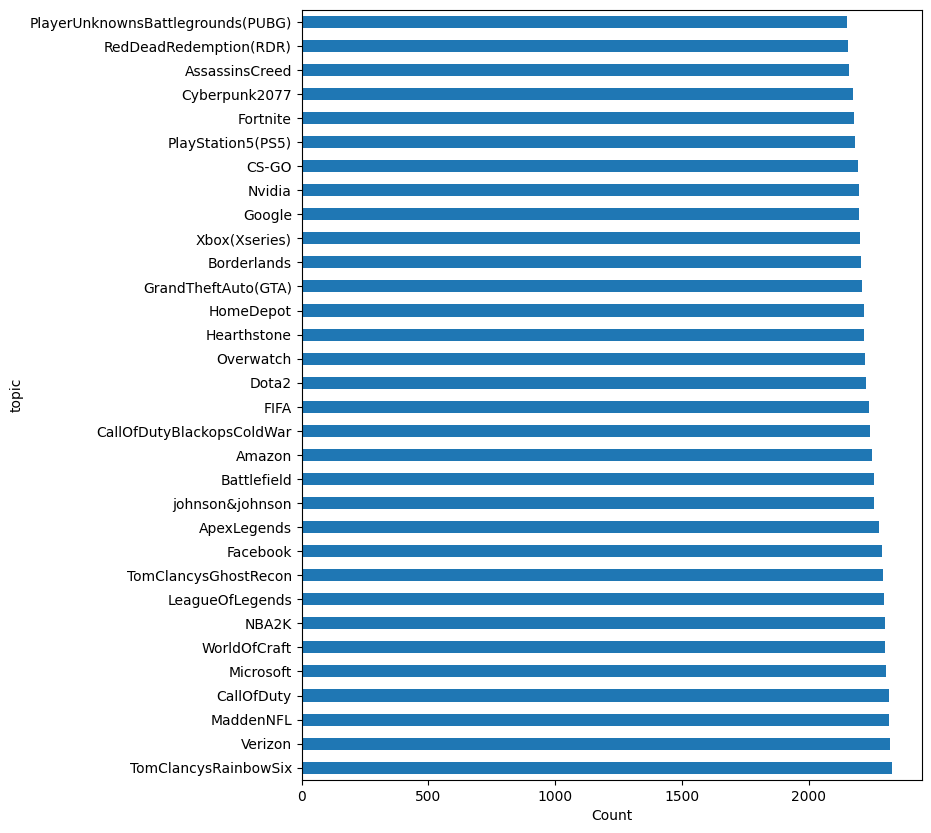

In [11]:
plt.figure(figsize=(8,10))
df['topic'].value_counts().plot(kind='barh')
plt.xlabel("Count")
plt.show()

## Sentiment distribution

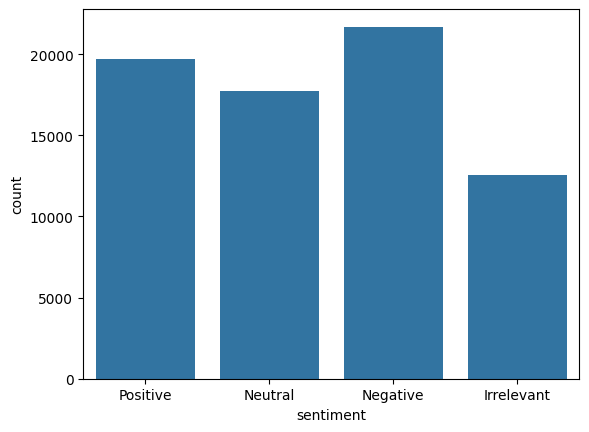

In [12]:
sns.countplot(x = 'sentiment',data=df)
plt.show()

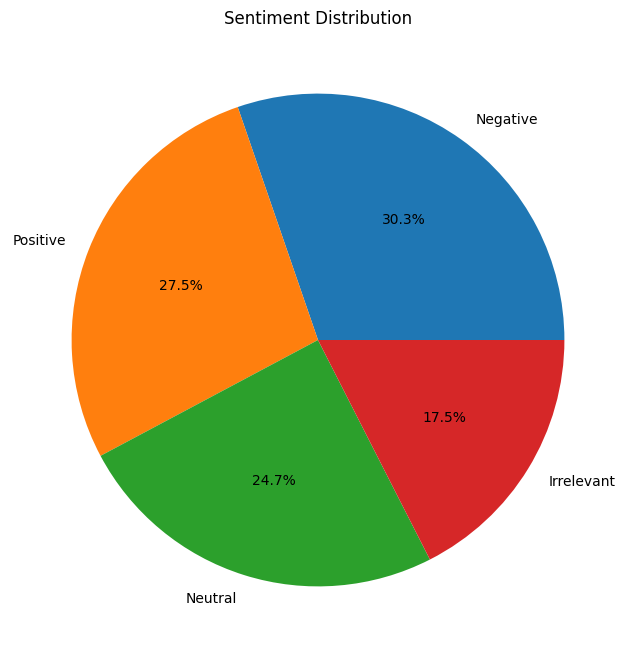

In [13]:
# Calculate the counts for each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%")

plt.title('Sentiment Distribution')

# Show the plot
plt.show()

In [14]:
import re
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove links
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

In [15]:
df

,number,topic,sentiment,text,cleaned_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...
...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,just realized that the windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,just realized that my mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,just realized the windows partition of my mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,just realized between the windows partition of...


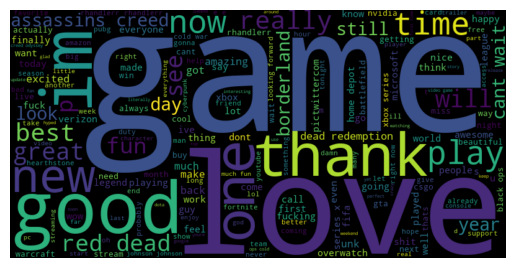

In [16]:
positive_text = ' '.join(df[df['sentiment'] == 'Positive']['cleaned_text'])
wordcloud = WordCloud(width=800, height=400).generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

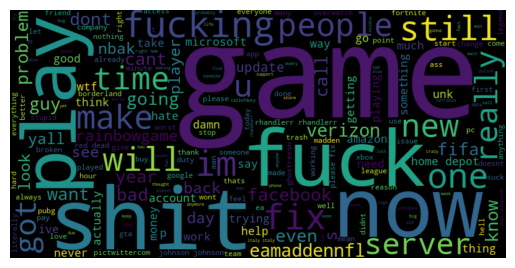

In [17]:
negative_text = ' '.join(df[df['sentiment'] == 'Negative']['cleaned_text'])
wordcloud = WordCloud(width=800, height=400).generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

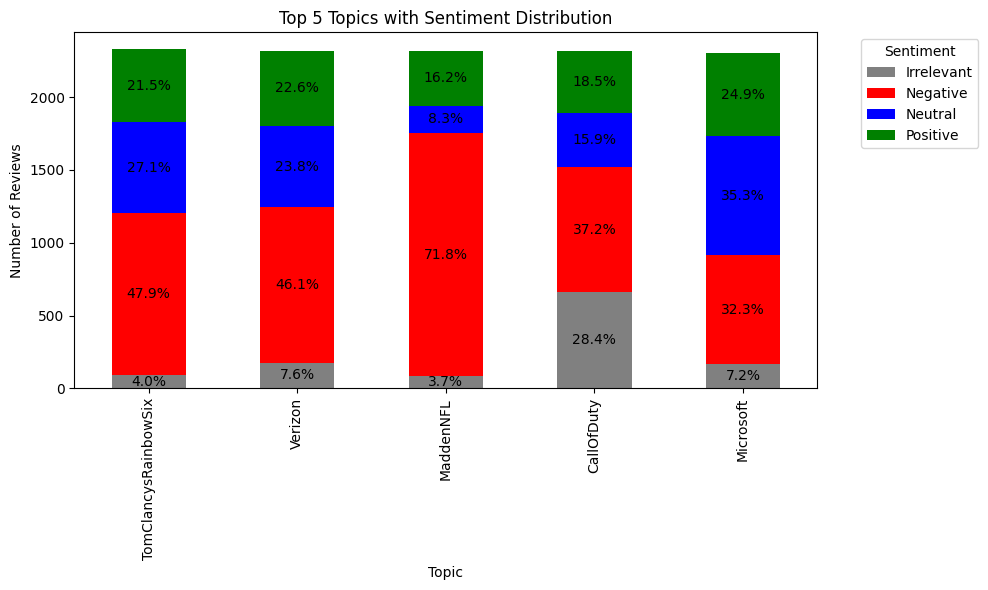

In [18]:
# Count occurrences of each sentiment for each topic
topic_sentiment_counts = df.groupby(['topic', 'sentiment']).size().unstack(fill_value=0)

# Filter to keep only the top 5 topics
top_5_topics = topic_sentiment_counts.sum(axis=1).nlargest(5).index  
topic_sentiment_counts = topic_sentiment_counts.loc[top_5_topics]

topic_sentiment_percentages = topic_sentiment_counts.div(topic_sentiment_counts.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
ax=topic_sentiment_counts.plot(kind='bar', stacked=True, figsize=(10,6), color=['gray', 'red', 'blue', 'green'])
plt.title('Top 5 Topics with Sentiment Distribution')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display percentages on the bars
for i,p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    topic_label = topic_sentiment_counts.index[i // len(topic_sentiment_counts.columns)]
    total = topic_sentiment_counts.sum(axis=1).loc[topic_label]  # Get the total for the specific topic
    ax.text(x + width / 2, y + height / 2, f'{(height / total * 100):.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# Conclusion
## Based on the observations from the Twitter sentiment analysis task, several key insights can be drawn:
### Most Frequent Topic: The topic "TomClancyRainbowSix" emerges as the most frequent topic of discussion among the analyzed Twitter data. This suggests a significant level of engagement or interest in this particular topic within the Twitter community.

### Sentiment Distribution: The sentiment analysis reveals that the majority of topics exhibit a negative sentiment, accounting for 30.3% of the sentiments observed. Following negative sentiment, positive sentiment is the next most prevalent, comprising 27.5% of the sentiments. Neutral sentiment closely follows at 24.7%, indicating a relatively balanced distribution between positive and neutral sentiments. Irrelevant sentiments, although less prevalent, still constitute a notable portion at 17.5%.

### Sentiment of Specific Topics: Notably, topics such as "Microsoft" predominantly exhibit a neutral sentiment. This observation suggests that discussions related to these tech giants tend to be more balanced or impartial in nature.

### Message Length: Another noteworthy observation is that the majority of messages analyzed are under 400 words in length. This indicates that Twitter users tend to convey their sentiments concisely and succinctly within the platform's character limit.

### In conclusion, the sentiment analysis provides valuable insights into the prevailing attitudes and opinions within the Twitter community regarding various topics. While negative sentiments appear to be more common overall, there is a diverse range of sentiments expressed across different topics.¶